# Currency rates analysis

#### This project is an explanation attempt of the price variation that has occured in the various currencies of major economies of the world from the year of 1999-2021.

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

##### We'll start by assessing the data in terms of what it looks like and how it is presented.

In [184]:
exchange_rates.head(3)

,Time,Australia_Dollar,[Bulgarian lev ],[Brazilian real ],Canada_Dollar,Swiss_Franc,China_Yuan,[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],Russia_Rouble,[Swedish krona ],Singapore_Dollar,[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_Dollar,[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123


In [185]:
exchange_rates.tail(3)

,Time,Australia_Dollar,[Bulgarian lev ],[Brazilian real ],Canada_Dollar,Swiss_Franc,China_Yuan,[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],Russia_Rouble,[Swedish krona ],Singapore_Dollar,[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_Dollar,[South African rand ]
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [186]:
exchange_rates.columns

Index(['Time', 'Australia_Dollar', '[Bulgarian lev ]', '[Brazilian real ]',
       'Canada_Dollar', 'Swiss_Franc', 'China_Yuan', '[Cypriot pound ]',
       '[Czech koruna ]', '[Danish krone ]', '[Estonian kroon ]', 'UK_Pound',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       'India_Rupee', '[Iceland krona ]', 'Japan_Yen', '[Korean won ]',
       '[Lithuanian litas ]', '[Latvian lats ]', '[Maltese lira ]',
       '[Mexican peso ]', '[Malaysian ringgit ]', '[Norwegian krone ]',
       '[New Zealand dollar ]', '[Philippine peso ]', '[Polish zloty ]',
       '[Romanian leu ]', 'Russia_Rouble', '[Swedish krona ]',
       'Singapore_Dollar', '[Slovenian tolar ]', '[Slovak koruna ]',
       '[Thai baht ]', '[Turkish lira ]', 'US_Dollar',
       '[South African rand ]'],
      dtype='object')

In [187]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   5699 non-null   object 
 1   Australia_Dollar       5699 non-null   object 
 2   [Bulgarian lev ]       5297 non-null   object 
 3   [Brazilian real ]      5431 non-null   object 
 4   Canada_Dollar          5699 non-null   object 
 5   Swiss_Franc            5699 non-null   object 
 6   China_Yuan             5431 non-null   object 
 7   [Cypriot pound ]       2346 non-null   object 
 8   [Czech koruna ]        5699 non-null   object 
 9   [Danish krone ]        5699 non-null   object 
 10  [Estonian kroon ]      3130 non-null   object 
 11  UK_Pound               5699 non-null   object 
 12  [Greek drachma ]       520 non-null    object 
 13  [Hong Kong dollar ]    5699 non-null   object 
 14  [Croatian kuna ]       5431 non-null   object 
 15  [Hun

In [188]:
exchange_rates.describe(include = 'all')

,Time,Australia_Dollar,[Bulgarian lev ],[Brazilian real ],Canada_Dollar,Swiss_Franc,China_Yuan,[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],Russia_Rouble,[Swedish krona ],Singapore_Dollar,[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_Dollar,[South African rand ]
count,5699,5699,5297,5431,5699,5699,5431,2346,5699,5699,...,5637.000000,5699,5699,5699,2085,2608,5699,5637.000000,5699,5699
unique,5699,3470,106,4854,2931,2920,4799,498,3708,485,...,NaN,5413,4396,3545,1377,2014,5080,NaN,3528,5465
top,2020-12-10,-,1.9558,-,-,-,-,0.58420,27.021,-,...,NaN,-,-,-,239.5000,-,-,NaN,-,-
freq,1,62,3964,61,62,62,61,108,120,62,...,NaN,62,62,62,44,48,62,NaN,62,62
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.867979,NaN,NaN,NaN,NaN,NaN,NaN,2.689991,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.862420,NaN,NaN,NaN,NaN,NaN,NaN,1.867694,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.291200,NaN,NaN,NaN,NaN,NaN,NaN,0.370100,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.516200,NaN,NaN,NaN,NaN,NaN,NaN,1.680000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.214200,NaN,NaN,NaN,NaN,NaN,NaN,2.103000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.476800,NaN,NaN,NaN,NaN,NaN,NaN,3.059300,NaN,NaN


##### Since we want to focus on major economies, we will only take a specific set of currencies into account and drop the rest.

The list of the countries we're taking into interest are as follows:

> USA

> UK

> Canada

> Switzerland

> Australia

> Japan

> China

> Singapore

> India

> Russia


Since the current dataset does not encompass middle-eastern data, we'll be skipping it.

#### We'll start by cleaning the data...

In [189]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   5699 non-null   object 
 1   Australia_Dollar       5699 non-null   object 
 2   [Bulgarian lev ]       5297 non-null   object 
 3   [Brazilian real ]      5431 non-null   object 
 4   Canada_Dollar          5699 non-null   object 
 5   Swiss_Franc            5699 non-null   object 
 6   China_Yuan             5431 non-null   object 
 7   [Cypriot pound ]       2346 non-null   object 
 8   [Czech koruna ]        5699 non-null   object 
 9   [Danish krone ]        5699 non-null   object 
 10  [Estonian kroon ]      3130 non-null   object 
 11  UK_Pound               5699 non-null   object 
 12  [Greek drachma ]       520 non-null    object 
 13  [Hong Kong dollar ]    5699 non-null   object 
 14  [Croatian kuna ]       5431 non-null   object 
 15  [Hun

In [190]:
# Renaming the columns that we desire first will help segregation into a new copy better, hence renaming is our 
# first step
exchange_rates.rename(columns = {'Period\\Unit:' : 'Time', '[US dollar ]' : 'US_Dollar', 
                                 '[UK pound sterling ]' : 'UK_Pound', '[Canadian dollar ]' : 'Canada_Dollar',
                                '[Swiss franc ]' : 'Swiss_Franc', '[Chinese yuan renminbi ]' : 'China_Yuan',
                                '[Australian dollar ]' : 'Australia_Dollar', '[Japanese yen ]' : 'Japan_Yen',
                                '[Singapore dollar ]' : 'Singapore_Dollar', '[Russian rouble ]' : 'Russia_Rouble',
                                '[Indian rupee ]' : 'India_Rupee'}, inplace = True)

In [191]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   5699 non-null   object 
 1   Australia_Dollar       5699 non-null   object 
 2   [Bulgarian lev ]       5297 non-null   object 
 3   [Brazilian real ]      5431 non-null   object 
 4   Canada_Dollar          5699 non-null   object 
 5   Swiss_Franc            5699 non-null   object 
 6   China_Yuan             5431 non-null   object 
 7   [Cypriot pound ]       2346 non-null   object 
 8   [Czech koruna ]        5699 non-null   object 
 9   [Danish krone ]        5699 non-null   object 
 10  [Estonian kroon ]      3130 non-null   object 
 11  UK_Pound               5699 non-null   object 
 12  [Greek drachma ]       520 non-null    object 
 13  [Hong Kong dollar ]    5699 non-null   object 
 14  [Croatian kuna ]       5431 non-null   object 
 15  [Hun

There! Our focus currencies are easier to spot but not quite actionable yet.
Hence, we'll create a new dataframe to store our specific columns in their clean state.

It's a cumbersome task but it's worth the effort.

In [192]:
major_currencies = exchange_rates[['Time', 'US_Dollar', 'UK_Pound', 'Australia_Dollar', 'Swiss_Franc', 
                                   'Canada_Dollar', 'China_Yuan', 'India_Rupee', 'Russia_Rouble', 
                                   'Singapore_Dollar', 'Japan_Yen']].copy()

In [193]:
major_currencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Time              5699 non-null   object
 1   US_Dollar         5699 non-null   object
 2   UK_Pound          5699 non-null   object
 3   Australia_Dollar  5699 non-null   object
 4   Swiss_Franc       5699 non-null   object
 5   Canada_Dollar     5699 non-null   object
 6   China_Yuan        5431 non-null   object
 7   India_Rupee       5431 non-null   object
 8   Russia_Rouble     5699 non-null   object
 9   Singapore_Dollar  5699 non-null   object
 10  Japan_Yen         5699 non-null   object
dtypes: object(11)
memory usage: 489.9+ KB


##### ATTABOY!

##### Another part of cleaning is now remaining, it's the date we need to fix.

In [194]:
major_currencies["Time"] = pd.to_datetime(major_currencies["Time"])

In [195]:
major_currencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              5699 non-null   datetime64[ns]
 1   US_Dollar         5699 non-null   object        
 2   UK_Pound          5699 non-null   object        
 3   Australia_Dollar  5699 non-null   object        
 4   Swiss_Franc       5699 non-null   object        
 5   Canada_Dollar     5699 non-null   object        
 6   China_Yuan        5431 non-null   object        
 7   India_Rupee       5431 non-null   object        
 8   Russia_Rouble     5699 non-null   object        
 9   Singapore_Dollar  5699 non-null   object        
 10  Japan_Yen         5699 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 489.9+ KB


In [196]:
major_currencies.head()

,Time,US_Dollar,UK_Pound,Australia_Dollar,Swiss_Franc,Canada_Dollar,China_Yuan,India_Rupee,Russia_Rouble,Singapore_Dollar,Japan_Yen
0,2021-01-08,1.2250,0.90128,1.5758,1.0827,1.5543,7.9184,89.7975,90.8000,1.6228,127.26
1,2021-01-07,1.2276,0.90190,1.5836,1.0833,1.5601,7.9392,90.0455,91.2000,1.6253,127.13
2,2021-01-06,1.2338,0.90635,1.5824,1.0821,1.5640,7.9653,90.2040,90.8175,1.6246,127.03
3,2021-01-05,1.2271,0.90333,1.5927,1.0803,1.5651,7.9315,89.8670,91.6715,1.6180,126.25
4,2021-01-04,1.2296,0.90160,1.5928,1.0811,1.5621,7.9484,89.7890,90.3420,1.6198,126.62


##### Now that our data is clean, we can proceed with exploration of our data and defining the context.
###### Since we're considering the major economies of the modern world, we can try to shape it in accordance with reknown super power of the World, the United States of America.

We are chosing this context because as a general condition, it is easy to assume that the United States of America has some impact on other economies around the world.

We'll start by checking for possible anomalies in each of the currencies.

In [197]:
#major_currencies["US_Dollar"].value_counts()
sample_dict = {}
for c in major_currencies.columns:
    sample_dict[c] = major_currencies[c].value_counts()
sample_dict

{'Time': 2000-10-13    1
 2003-03-11    1
 2001-12-17    1
 2007-01-23    1
 2002-05-02    1
              ..
 2019-11-28    1
 1999-07-22    1
 2018-09-13    1
 2007-04-16    1
 2018-06-21    1
 Name: Time, Length: 5699, dtype: int64,
 'US_Dollar': -         62
 1.2276     9
 1.1215     8
 1.1305     7
 1.3532     6
           ..
 1.2298     1
 1.4461     1
 0.9783     1
 0.8753     1
 1.3182     1
 Name: US_Dollar, Length: 3528, dtype: int64,
 'UK_Pound': -          62
 0.87750     7
 0.67930     7
 0.90430     7
 0.68880     7
            ..
 0.91403     1
 0.90033     1
 0.84058     1
 0.83530     1
 0.90030     1
 Name: UK_Pound, Length: 3470, dtype: int64,
 'Australia_Dollar': -         62
 1.6242     8
 1.6282     7
 1.6194     7
 1.6175     7
           ..
 1.5322     1
 1.7745     1
 1.7952     1
 1.4697     1
 1.5187     1
 Name: Australia_Dollar, Length: 3470, dtype: int64,
 'Swiss_Franc': -         62
 1.2010    45
 1.2011    13
 1.2009    13
 1.2014    10
           ..
 1.

It is broadly noticeable that there are 62 values in each column that are equal '-'.

Hence, we need to start by getting rid of the same.

In [198]:
for c in major_currencies.columns:
    major_currencies.drop(major_currencies[major_currencies[c] == '-'].index, inplace = True)
major_currencies.head()

,Time,US_Dollar,UK_Pound,Australia_Dollar,Swiss_Franc,Canada_Dollar,China_Yuan,India_Rupee,Russia_Rouble,Singapore_Dollar,Japan_Yen
0,2021-01-08,1.2250,0.90128,1.5758,1.0827,1.5543,7.9184,89.7975,90.8000,1.6228,127.26
1,2021-01-07,1.2276,0.90190,1.5836,1.0833,1.5601,7.9392,90.0455,91.2000,1.6253,127.13
2,2021-01-06,1.2338,0.90635,1.5824,1.0821,1.5640,7.9653,90.2040,90.8175,1.6246,127.03
3,2021-01-05,1.2271,0.90333,1.5927,1.0803,1.5651,7.9315,89.8670,91.6715,1.6180,126.25
4,2021-01-04,1.2296,0.90160,1.5928,1.0811,1.5621,7.9484,89.7890,90.3420,1.6198,126.62


In [199]:
major_currencies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              5637 non-null   datetime64[ns]
 1   US_Dollar         5637 non-null   object        
 2   UK_Pound          5637 non-null   object        
 3   Australia_Dollar  5637 non-null   object        
 4   Swiss_Franc       5637 non-null   object        
 5   Canada_Dollar     5637 non-null   object        
 6   China_Yuan        5370 non-null   object        
 7   India_Rupee       5370 non-null   object        
 8   Russia_Rouble     5637 non-null   object        
 9   Singapore_Dollar  5637 non-null   object        
 10  Japan_Yen         5637 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 688.5+ KB


> So we now have data that is purely numbers.

_BUT_ we have the numeric data in object dtype format which makes it unactionable for this context so we must now change the values to float type for convenience.

In [200]:
for c in major_currencies.columns:
    if c != 'Time':
        major_currencies[c] = major_currencies[c].astype(float)
major_currencies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              5637 non-null   datetime64[ns]
 1   US_Dollar         5637 non-null   float64       
 2   UK_Pound          5637 non-null   float64       
 3   Australia_Dollar  5637 non-null   float64       
 4   Swiss_Franc       5637 non-null   float64       
 5   Canada_Dollar     5637 non-null   float64       
 6   China_Yuan        5370 non-null   float64       
 7   India_Rupee       5370 non-null   float64       
 8   Russia_Rouble     5637 non-null   float64       
 9   Singapore_Dollar  5637 non-null   float64       
 10  Japan_Yen         5637 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 688.5 KB


Alright!

Now our comparison activity can start off.

<Figure size 432x288 with 0 Axes>

US_Dollar


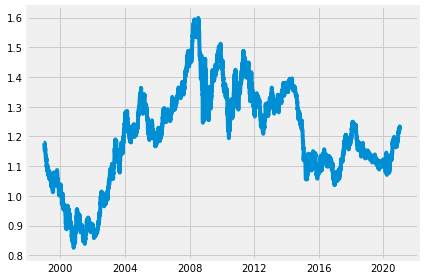

UK_Pound


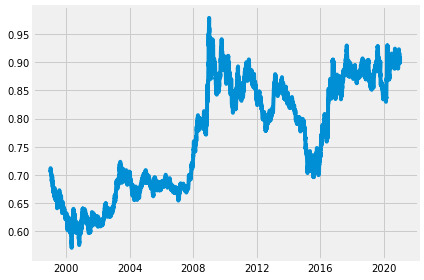

Australia_Dollar


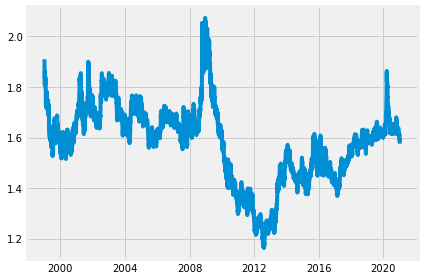

Swiss_Franc


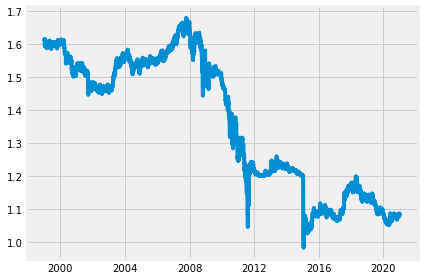

Canada_Dollar


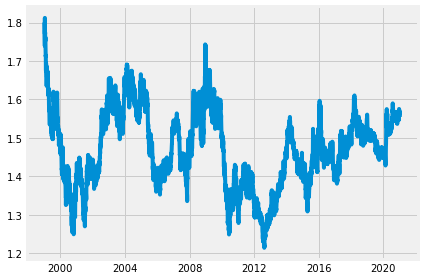

China_Yuan


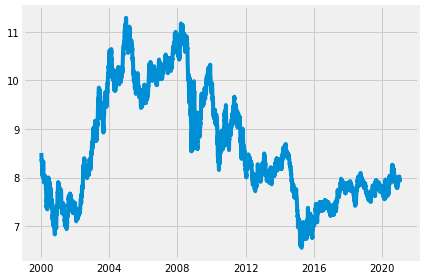

India_Rupee


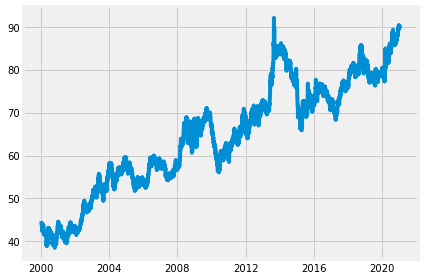

Russia_Rouble


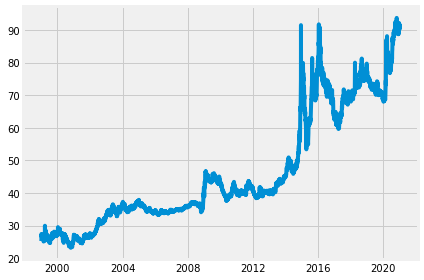

Singapore_Dollar


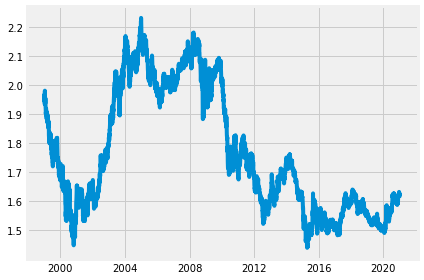

Japan_Yen


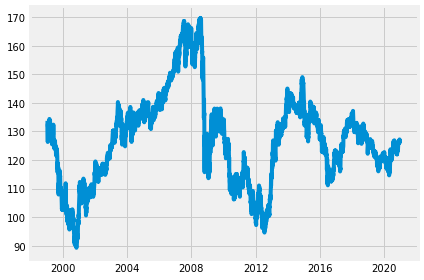

In [201]:
#c = major_currencies.columns
for c in major_currencies.columns:
    if c != "Time":
        plt.plot(major_currencies["Time"], major_currencies[c])
        plt.subplots_adjust()
        print(c)
    plt.tight_layout()
    plt.show()

_The price movement of the exchange rates as original values display the high volatility which makes it difficult to assess the correlation between different economies._

__To resolve such an issue, the display of a smoothened graph is essential.
We use Rolling mean a.k.a Moving Average to smoothen the graphs and display long term of trends.__

Time


<Figure size 864x720 with 0 Axes>

US_Dollar


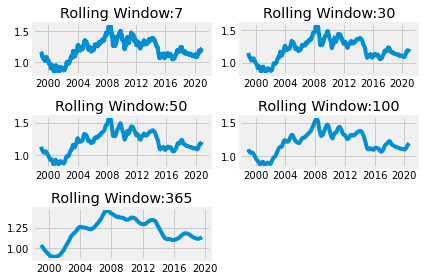

UK_Pound


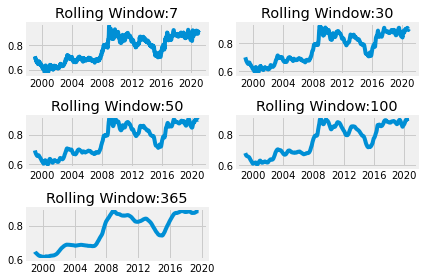

Australia_Dollar


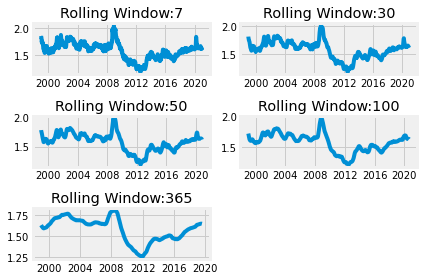

Swiss_Franc


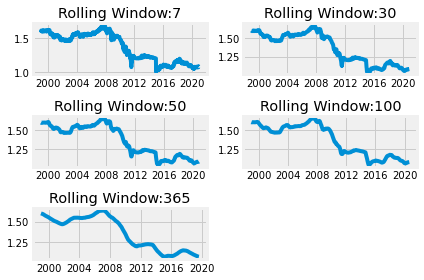

Canada_Dollar


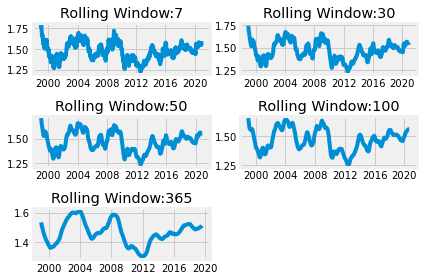

China_Yuan


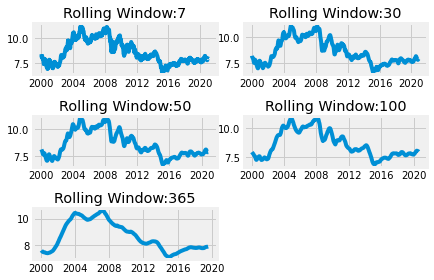

India_Rupee


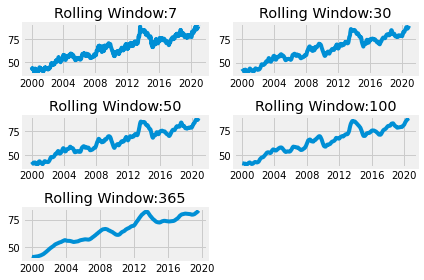

Russia_Rouble


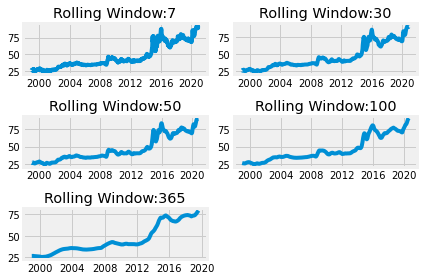

Singapore_Dollar


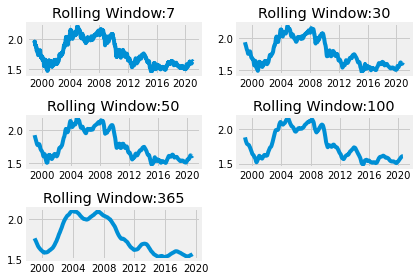

Japan_Yen


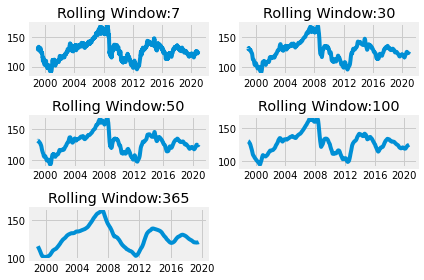

In [202]:
plt.figure(figsize=(12,10))
for c in major_currencies.columns:
    if c != 'Time':
        for i, rolling_mean in zip([1, 2, 3, 4, 5],[7, 30, 50, 100, 365]):
            plt.subplot(3,2,i)
            plt.plot(major_currencies['Time'],major_currencies[c].rolling(rolling_mean).mean())
            plt.title('Rolling Window:' + str(rolling_mean))#, weight='bold')
    plt.tight_layout()
    print(c)
    plt.show()

In the graph above, we've displayed the rolling mean for different periods 7, 30, 50, 100 & 365 days respectively.

Since we need to use the rolling mean values and need smoothened graph closest to the original data values, hence, choosing the 7 day or 30 day values seem feasible.

Choosing the 30 day MA and storing those values in the dataframe for the US Dollar specifically is essential for the formation of an end-point of the story.

_We'll then look at the behaviours of the other currencies to a 30 day MA of the US Dollar and mark the end of this project._

In [203]:
major_currencies['USD_rolling_mean'] = major_currencies['US_Dollar'].rolling(30).mean()
major_currencies.head(50)

,Time,US_Dollar,UK_Pound,Australia_Dollar,Swiss_Franc,Canada_Dollar,China_Yuan,India_Rupee,Russia_Rouble,Singapore_Dollar,Japan_Yen,USD_rolling_mean
0,2021-01-08,1.2250,0.90128,1.5758,1.0827,1.5543,7.9184,89.7975,90.8000,1.6228,127.26,NaN
1,2021-01-07,1.2276,0.90190,1.5836,1.0833,1.5601,7.9392,90.0455,91.2000,1.6253,127.13,NaN
2,2021-01-06,1.2338,0.90635,1.5824,1.0821,1.5640,7.9653,90.2040,90.8175,1.6246,127.03,NaN
3,2021-01-05,1.2271,0.90333,1.5927,1.0803,1.5651,7.9315,89.8670,91.6715,1.6180,126.25,NaN
4,2021-01-04,1.2296,0.90160,1.5928,1.0811,1.5621,7.9484,89.7890,90.3420,1.6198,126.62,NaN
5,2020-12-31,1.2271,0.89903,1.5896,1.0802,1.5633,8.0225,89.6605,91.4671,1.6218,126.49,NaN
6,2020-12-30,1.2281,0.90307,1.6025,1.0857,1.5701,8.0134,89.8824,91.8851,1.6257,126.57,NaN
7,2020-12-29,1.2259,0.90863,1.6121,1.0862,1.5713,8.0070,89.9420,90.1883,1.6274,127.23,NaN
8,2020-12-28,1.2219,0.90408,1.6083,1.0854,1.5677,7.9906,89.8145,90.0681,1.6237,126.54,NaN
9,2020-12-24,1.2193,0.89795,1.6039,1.0851,1.5656,7.9624,89.6845,90.5914,1.6195,126.38,NaN


##### Now that we have our column, the crafting of the end-point of the story begins.

###### The consideration of the story is the reaction of different economies to the financial crisis of 2007-2008 in the USA.

For the base of the chart, we'll use a shorter time frame, such as that of 5 years.
Since the crisis occured from 2007-2008, we'll be using 2 years prior and 2 years post the event as our base to graph on a shorter and more conspicuous chart.

In [204]:
crisis_pre_pos = major_currencies.copy()[(major_currencies["Time"].dt.year >= 2005) & (major_currencies["Time"].dt.year <= 2010)] 

In [205]:
crisis_pre_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1537 entries, 2569 to 4133
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              1537 non-null   datetime64[ns]
 1   US_Dollar         1537 non-null   float64       
 2   UK_Pound          1537 non-null   float64       
 3   Australia_Dollar  1537 non-null   float64       
 4   Swiss_Franc       1537 non-null   float64       
 5   Canada_Dollar     1537 non-null   float64       
 6   China_Yuan        1537 non-null   float64       
 7   India_Rupee       1537 non-null   float64       
 8   Russia_Rouble     1537 non-null   float64       
 9   Singapore_Dollar  1537 non-null   float64       
 10  Japan_Yen         1537 non-null   float64       
 11  USD_rolling_mean  1537 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 156.1 KB


Now we need the concentrated crisis year isolated i.e the year of 2007-2008.

_Therefore,_

In [206]:
crisis_0708 = major_currencies.copy()[(major_currencies["Time"].dt.year >= 2007) & (major_currencies["Time"].dt.year <= 2008)] 

In [207]:
crisis_0708.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 3091 to 3612
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              511 non-null    datetime64[ns]
 1   US_Dollar         511 non-null    float64       
 2   UK_Pound          511 non-null    float64       
 3   Australia_Dollar  511 non-null    float64       
 4   Swiss_Franc       511 non-null    float64       
 5   Canada_Dollar     511 non-null    float64       
 6   China_Yuan        511 non-null    float64       
 7   India_Rupee       511 non-null    float64       
 8   Russia_Rouble     511 non-null    float64       
 9   Singapore_Dollar  511 non-null    float64       
 10  Japan_Yen         511 non-null    float64       
 11  USD_rolling_mean  511 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 51.9 KB


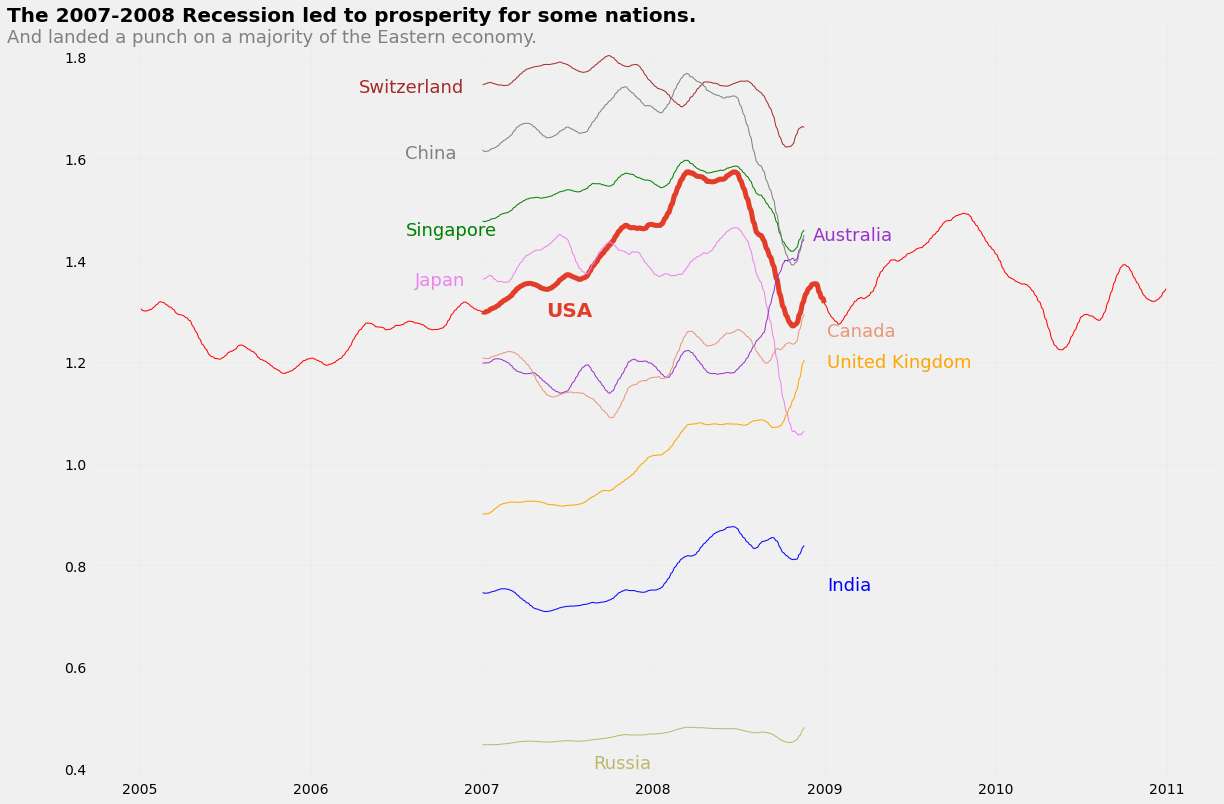

In [375]:
#Drawing the dollar equivalency for the rest of the currencies.
crisis_0708["jpy_usd"] = crisis_0708["Japan_Yen"] * 0.0087
crisis_0708["aud_usd"] = crisis_0708["Australia_Dollar"] * 0.72
crisis_0708["chf_usd"] = crisis_0708["Swiss_Franc"] * 1.08
crisis_0708["ind_usd"] = crisis_0708["India_Rupee"] * 0.013
crisis_0708["yuan_usd"] = crisis_0708["China_Yuan"] * 0.16
crisis_0708["cand_usd"] = crisis_0708["Canada_Dollar"] * 0.79
crisis_0708["sind_usd"] = crisis_0708["Singapore_Dollar"] * 0.74
crisis_0708["rusr_usd"] = crisis_0708["Russia_Rouble"] * 0.013
crisis_0708["uksp_usd"] = crisis_0708["UK_Pound"] * 1.36

style.use('fivethirtyeight')

### Adding the plot
fig, ax = plt.subplots(figsize=(18,13))
ax.plot(crisis_pre_pos['Time'],
        crisis_pre_pos['USD_rolling_mean'],
        linewidth=1, color='red')

### Highlighting the 2007-2008 period for USA
ax.plot(crisis_0708['Time'],
        crisis_0708['USD_rolling_mean'],
        linewidth=5, color='#e23d28')

### Highlighting the 2007-2008 period for differenting currencies
ax.plot(crisis_0708['Time'],
        crisis_0708['jpy_usd'].rolling(30).mean(),
        linewidth=1, color='violet')

ax.plot(crisis_0708['Time'],
        crisis_0708['uksp_usd'].rolling(30).mean(),
        linewidth=1, color='orange')

ax.plot(crisis_0708['Time'],
        crisis_0708['rusr_usd'].rolling(30).mean(),
        linewidth=1, color='darkkhaki')

ax.plot(crisis_0708['Time'],
        crisis_0708['aud_usd'].rolling(30).mean(),
        linewidth=1, color='darkorchid')

ax.plot(crisis_0708['Time'],
        crisis_0708['cand_usd'].rolling(30).mean(),
        linewidth=1, color='darksalmon')

ax.plot(crisis_0708['Time'],
        crisis_0708['sind_usd'].rolling(30).mean(),
        linewidth=1, color='green')

ax.plot(crisis_0708['Time'],
        crisis_0708['chf_usd'].rolling(30).mean(),
        linewidth=1, color='brown')

ax.plot(crisis_0708['Time'],
        crisis_0708['ind_usd'].rolling(30).mean(),
        linewidth=1, color='blue')

ax.plot(crisis_0708['Time'],
        crisis_0708['yuan_usd'].rolling(30).mean(),
        linewidth=1, color='grey')
ax.text(13650, 1.29, 'USA', color='#e23d28', size = 20, weight = 'bold')
ax.text(13250, 1.73, 'Switzerland', color='brown', size = 18)
ax.text(13350, 1.60, 'China', color='grey', size = 18)
ax.text(13350, 1.45, 'Singapore', color='green', size = 18)
ax.text(13370, 1.35, 'Japan', color='violet', size = 18)
ax.text(14250, 1.25, 'Canada', color='darksalmon', size = 18)
ax.text(14250, 1.19, 'United Kingdom', color='orange', size = 18)
ax.text(14250, 0.75, 'India', color='blue', size = 18)
ax.text(13750, 0.4, 'Russia', color='darkkhaki', size = 18)
ax.text(14220, 1.44, 'Australia', color='darkorchid', size = 18)
ax.text(12500.0, 1.87, "The 2007-2008 Recession led to prosperity for some nations.",
        weight='bold', size = 20)
ax.text(12500.0, 1.83, "And landed a punch on a majority of the Eastern economy.", 
        size = 18, color = 'grey')
ax.grid(alpha=0.1)
plt.show()

### Conclusion:

_The 2007-2008 recession lead to the downfall of the United States of America and it's Eastern exporters such as China, Japan and Singapore, as the graph validly shows._

_While a few countries suffered, a few also prospered, the United Kingdom, Australia, Canada and India seem to have not taken much of a loss but rather prospered on the contrary._

_Russia on the other hand seems completely unaffected by the operations of the modern economic world._